<a href="https://colab.research.google.com/github/whenvanshcodes/cc-fraud/blob/main/CC_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('''
Name: vansh bhati

Project: Credit Card Fraud Detection using Machine Learning
IDE: colab''')


Name: vansh bhati

Project: Credit Card Fraud Detection using Machine Learning
IDE: jupyter notebook


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
legit_sample = legit.sample(n = 492)
newDataset = pd.concat([legit_sample, fraud],axis = 0)
newDataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111479,72243.0,-1.415572,1.463661,1.314915,2.794417,-0.120564,0.880893,-0.357094,0.480315,-0.478192,...,0.156815,0.611148,-0.053470,-0.602904,-0.107491,0.356428,-0.367255,0.228819,0.00,0
230114,146192.0,0.113726,0.993156,-1.109155,-0.000024,0.181336,-1.249748,0.729364,0.129684,-0.143993,...,0.356289,0.938015,0.026835,-0.164978,-0.261258,-0.143362,-0.084249,-0.044769,60.00,0
34818,37837.0,-0.398807,0.503395,1.315207,-1.782612,0.175342,-0.308516,0.315671,-0.015527,-1.587464,...,-0.104980,-0.412747,-0.184975,-0.533734,0.366134,-0.497785,-0.005494,-0.009299,15.00,0
115183,73776.0,-0.657192,1.067390,1.082440,-0.452933,0.503007,0.362451,0.457399,0.315583,-0.329651,...,-0.242139,-0.591953,-0.098072,-0.884131,-0.148619,0.143466,0.379327,0.158047,1.79,0
136459,81714.0,0.980599,-0.454326,0.037759,-0.533485,-0.900934,-0.996548,-0.179907,-0.020604,1.338002,...,0.059333,0.111133,-0.202493,0.447991,0.559167,-0.665649,0.057894,0.063283,117.50,0


In [ ]:
newDataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
newDataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93996.670732,-0.038966,0.038173,-0.030037,-0.133900,0.083322,-0.043435,0.013106,-0.004089,-0.030540,...,-0.007893,0.034290,0.033076,0.001076,-0.010316,0.034407,0.013767,0.030953,0.017237,72.667663
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
X = newDataset.drop(columns = 'Class', axis = 1)
Y = newDataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
111479   72243.0 -1.415572  1.463661  1.314915  2.794417 -0.120564  0.880893   
230114  146192.0  0.113726  0.993156 -1.109155 -0.000024  0.181336 -1.249748   
34818    37837.0 -0.398807  0.503395  1.315207 -1.782612  0.175342 -0.308516   
115183   73776.0 -0.657192  1.067390  1.082440 -0.452933  0.503007  0.362451   
136459   81714.0  0.980599 -0.454326  0.037759 -0.533485 -0.900934 -0.996548   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

111479    0
230114    0
34818     0
115183    0
136459    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_precision = precision_score(Y_test, dt_predictions)
dt_recall = recall_score(Y_test, dt_predictions)
dt_f1 = f1_score(Y_test, dt_predictions)

dt_roc_auc = roc_auc_score(Y_test, dt_predictions)
dt_log_loss = log_loss(Y_test, dt_predictions)

In [ ]:
print("Decision Tree Metrices:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")
print(f"ROC AUC: {dt_roc_auc:.2f}")
print(f"Log Loss: {dt_log_loss:.2f}")

pd.crosstab(Y_test, dt_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Decision Tree Metrices:
Accuracy: 0.93
Precision: 0.92
Recall: 0.94
F1 Score: 0.93
ROC AUC: 0.93
Log Loss: 2.56


Predicted,0,1,All
True,,,
0,91,8,99
1,6,92,98
All,97,100,197


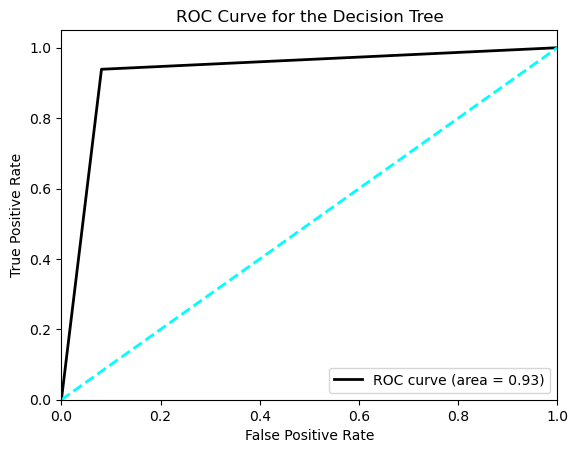

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.92      0.94      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [ ]:
confusion_matrix(Y_test, dt_predictions)
cm = confusion_matrix(Y_test, dt_predictions)
# Extract true negatives (TN), false positive (FP), false negatives (FN), and true
TN, FP, FN, TP = cm.ravel()
#Calculate specificity
specificity = TN / (TN +FP)
# Print the specificity score
print("Specificity:", specificity)

Specificity: 0.9191919191919192


In [ ]:
from sklearn.metrics import jaccard_score
# Calculate the Jaccard similarity coefficient
jaccard_similarity1 = jaccard_score(Y_test, dt_predictions)
print("Jaccard Similarity:", jaccard_similarity1)

Jaccard Similarity: 0.8679245283018868


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth = 5)

# Create an AdaBoostClassifier with the base classifier and 50 estimators
classifier = AdaBoostClassifier(estimator = base_classifier, n_estimators = 50)

In [ ]:
classifier.fit(X_train, Y_train)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5))

In [ ]:
adb_predictions = classifier.predict(X_test)

In [ ]:
Y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [ ]:
accuracy = accuracy_score(Y_test, adb_predictions)
precision = precision_score(Y_test, adb_predictions)
recall =  recall_score(Y_test, adb_predictions)
f1 = f1_score(Y_test, adb_predictions)
adb_roc_auc = roc_auc_score(Y_test, adb_predictions)

print("Accuaray:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", adb_roc_auc)

Accuaray: 0.9695431472081218
Precision: 1.0
Recall: 0.9387755102040817
F1 Score: 0.968421052631579
AUC-ROC Score: 0.9693877551020409


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.crosstab(Y_test, adb_predictions, rownames=['True'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,99,0,99
1,6,92,98
All,105,92,197


In [ ]:
from sklearn.metrics import log_loss
probabilities = classifier.predict_proba(X_test)
logloss = log_loss (Y_test, probabilities)
print("Log Loss:", logloss)

Log Loss: 0.2646316998547003


In [ ]:
from sklearn.metrics import roc_curve

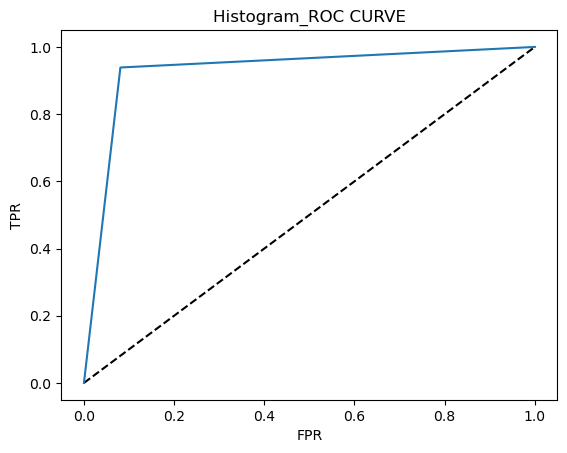

In [ ]:
plt.plot([0,1],[0,1],'k--');
plt.plot(fpr,tpr,label='model');
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Histogram_ROC CURVE')
plt.show()

In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,adb_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        99
           1       1.00      0.94      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [ ]:
# Calculate Specificity
specificity = TN / (TN + FP)
# Print the Specificity Score
print("Specificity:", specificity)

from sklearn.metrics import jaccard_score

# Calculate the Jaccard similarity coefficient
jaccard_similarity1 = jaccard_score(Y_test, adb_predictions)
# Print the Jaccard similarity coefficient
print("Jaccard Similarity:",jaccard_similarity1)

Specificity: 0.9191919191919192
Jaccard Similarity: 0.9387755102040817
